<a href="https://colab.research.google.com/github/Almasyriqi/PCVK_Genap_2022/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Modul 5 PCVK**

Nama : M. Syifa'ul Ikrom Almasyriqi

Kelas : TI-3G

NIM : 1941720057

In [ ]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import Library
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import sys
import glob

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


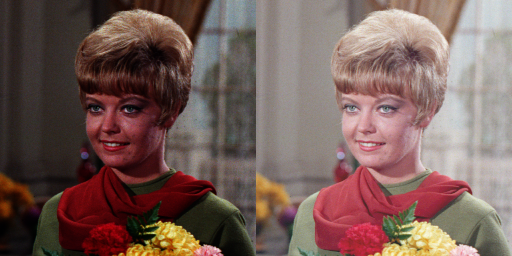

In [ ]:
# Tugas 1
# Gamma Correction

print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

# Fungsi untuk menghitung gamma correction dengan memasukkan parameter source image dan nilai gamma yang tela diinput
def gammaCorrection(src, gamma):
    invGamma = 1 / gamma
 
    table = [((i / 255) ** invGamma) * 255 for i in range(256)]
    table = np.array(table, np.uint8)
 
    return cv.LUT(src, table)

gamma_image = gammaCorrection(original, gamma)
final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

 Simulasi Image Depth 
----------------------------------------------


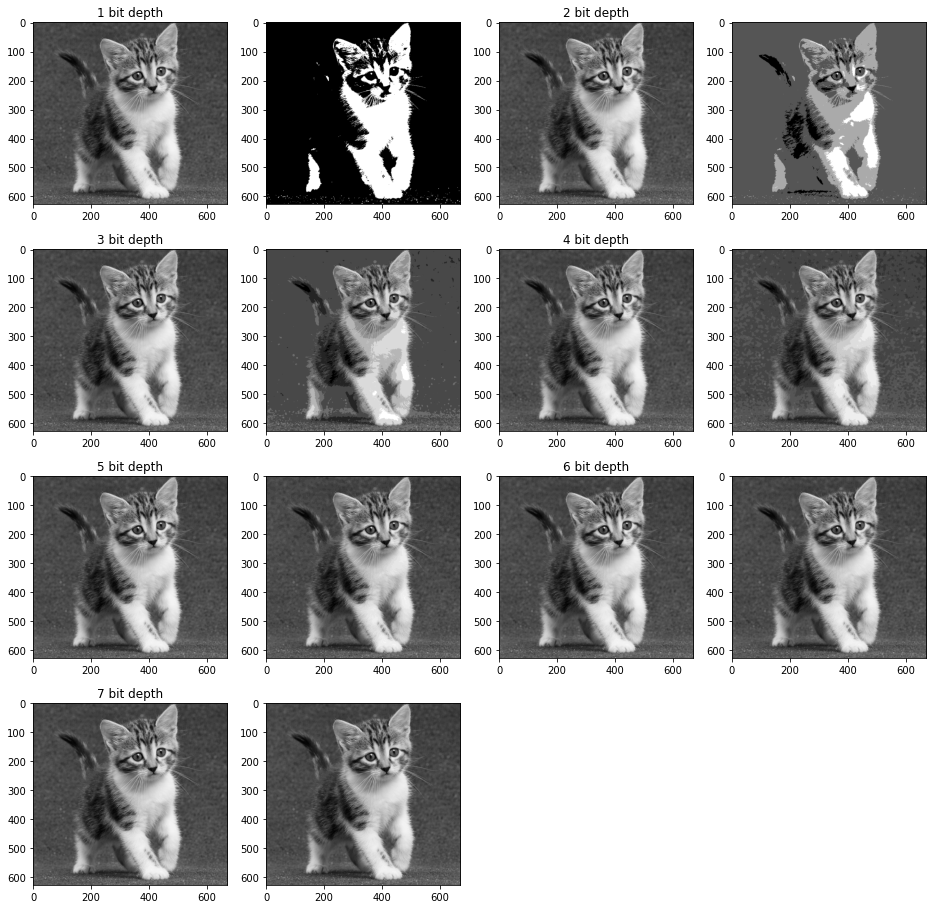

In [ ]:
# Tugas 2
# Image Depth

# Membuat figure
fig = plt.figure(figsize=(16, 16))
title = ["1 bit depth", "2 bit depth", "3 bit depth", "4 bit depth", "5 bit depth", "6 bit depth", "7 bit depth"]
  
# setting jumlah baris dan kolom
rows = 4
columns = 4

print(' Simulasi Image Depth ')
print('----------------------------------------------')

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/kitten01.jpg', cv.IMREAD_GRAYSCALE)
a_image = np.zeros(original.shape, original.dtype)
b_image = np.zeros(original.shape, original.dtype)
c_image = np.zeros(original.shape, original.dtype)
d_image = np.zeros(original.shape, original.dtype)
e_image = np.zeros(original.shape, original.dtype)
f_image = np.zeros(original.shape, original.dtype)
g_image = np.zeros(original.shape, original.dtype)
arr_image = [a_image, b_image, c_image, d_image, e_image, f_image, g_image]

# Menghitung nilai bit depth dari bit 1 sampai 7
for i in range(7):
  depth = i+1
  level = 255 / ((2**depth)-1)
  arr_image[i][:,:] = np.round(original[:,:] / level) * level

# Adds a subplot 
indeks = 0
index = 0
for i in range(14):
  fig.add_subplot(rows, columns, i+1)
  if(i%2 == 0):
    plt.title(title[indeks])
    plt.imshow(original, cmap='gray')
    indeks += 1
  else:
    plt.imshow(arr_image[index], cmap='gray')
    index += 1

Average  5
PSNR:  27.54446824744555


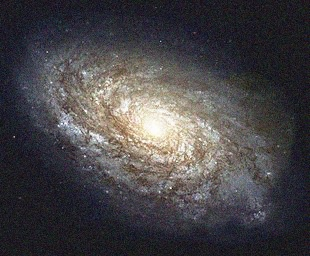



Average  30
PSNR:  27.48046619707707


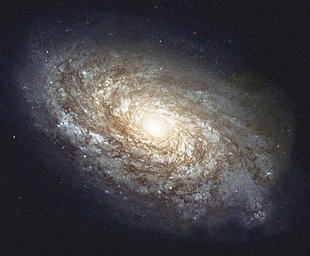



Average  60
PSNR:  27.420226169322994


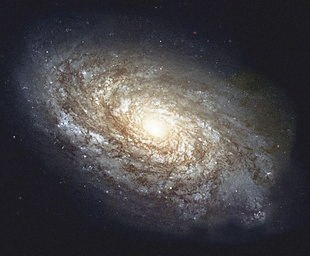



Average  80
PSNR:  27.39397140368274


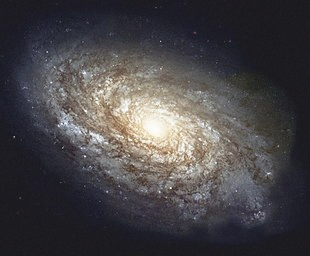



Average  100
PSNR:  27.370931279516654


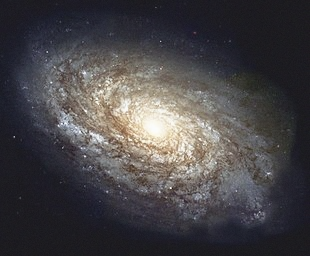

In [ ]:
# Tugas 3
# modul Average Denoising

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/galaxy.jpg')
a_image = np.zeros(original.shape, original.dtype)
b_image = np.zeros(original.shape, original.dtype)
c_image = np.zeros(original.shape, original.dtype)
d_image = np.zeros(original.shape, original.dtype)
e_image = np.zeros(original.shape, original.dtype)
arr_image = [a_image, b_image, c_image, d_image, e_image]
jumlah_citra = [5, 30, 60, 80, 100]

# Menyimpan 100 image yang telah diberi gaussian noise pada sebuah variabel menggunakan library glob
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK_MM/Images/noises/*.jpg'):
  n= cv.imread(img)
  cv_img.append(n)

# Fungsi untuk menghitung nilai PSNR dengan membandingkan 2 gambar
def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
  return psnr

# Menghitung average citra
for citra in range(len(jumlah_citra)):
  for i in range(original.shape[0]):
    for j in range(original.shape[1]):
      for c in range(original.shape[2]):
        jumlah = 0
        average = 0
        for n in range(jumlah_citra[citra]):
          jumlah += cv_img[n][i,j,c]
        average = float(jumlah / jumlah_citra[citra])
        arr_image[citra][i,j,c] = average

for i in range(len(jumlah_citra)):
  print("Average ", jumlah_citra[i])
  print("PSNR: ", PSNR(original, arr_image[i]))
  cv2_imshow(arr_image[i])
  print("\n")

 Image masking 
----------------------------------------------


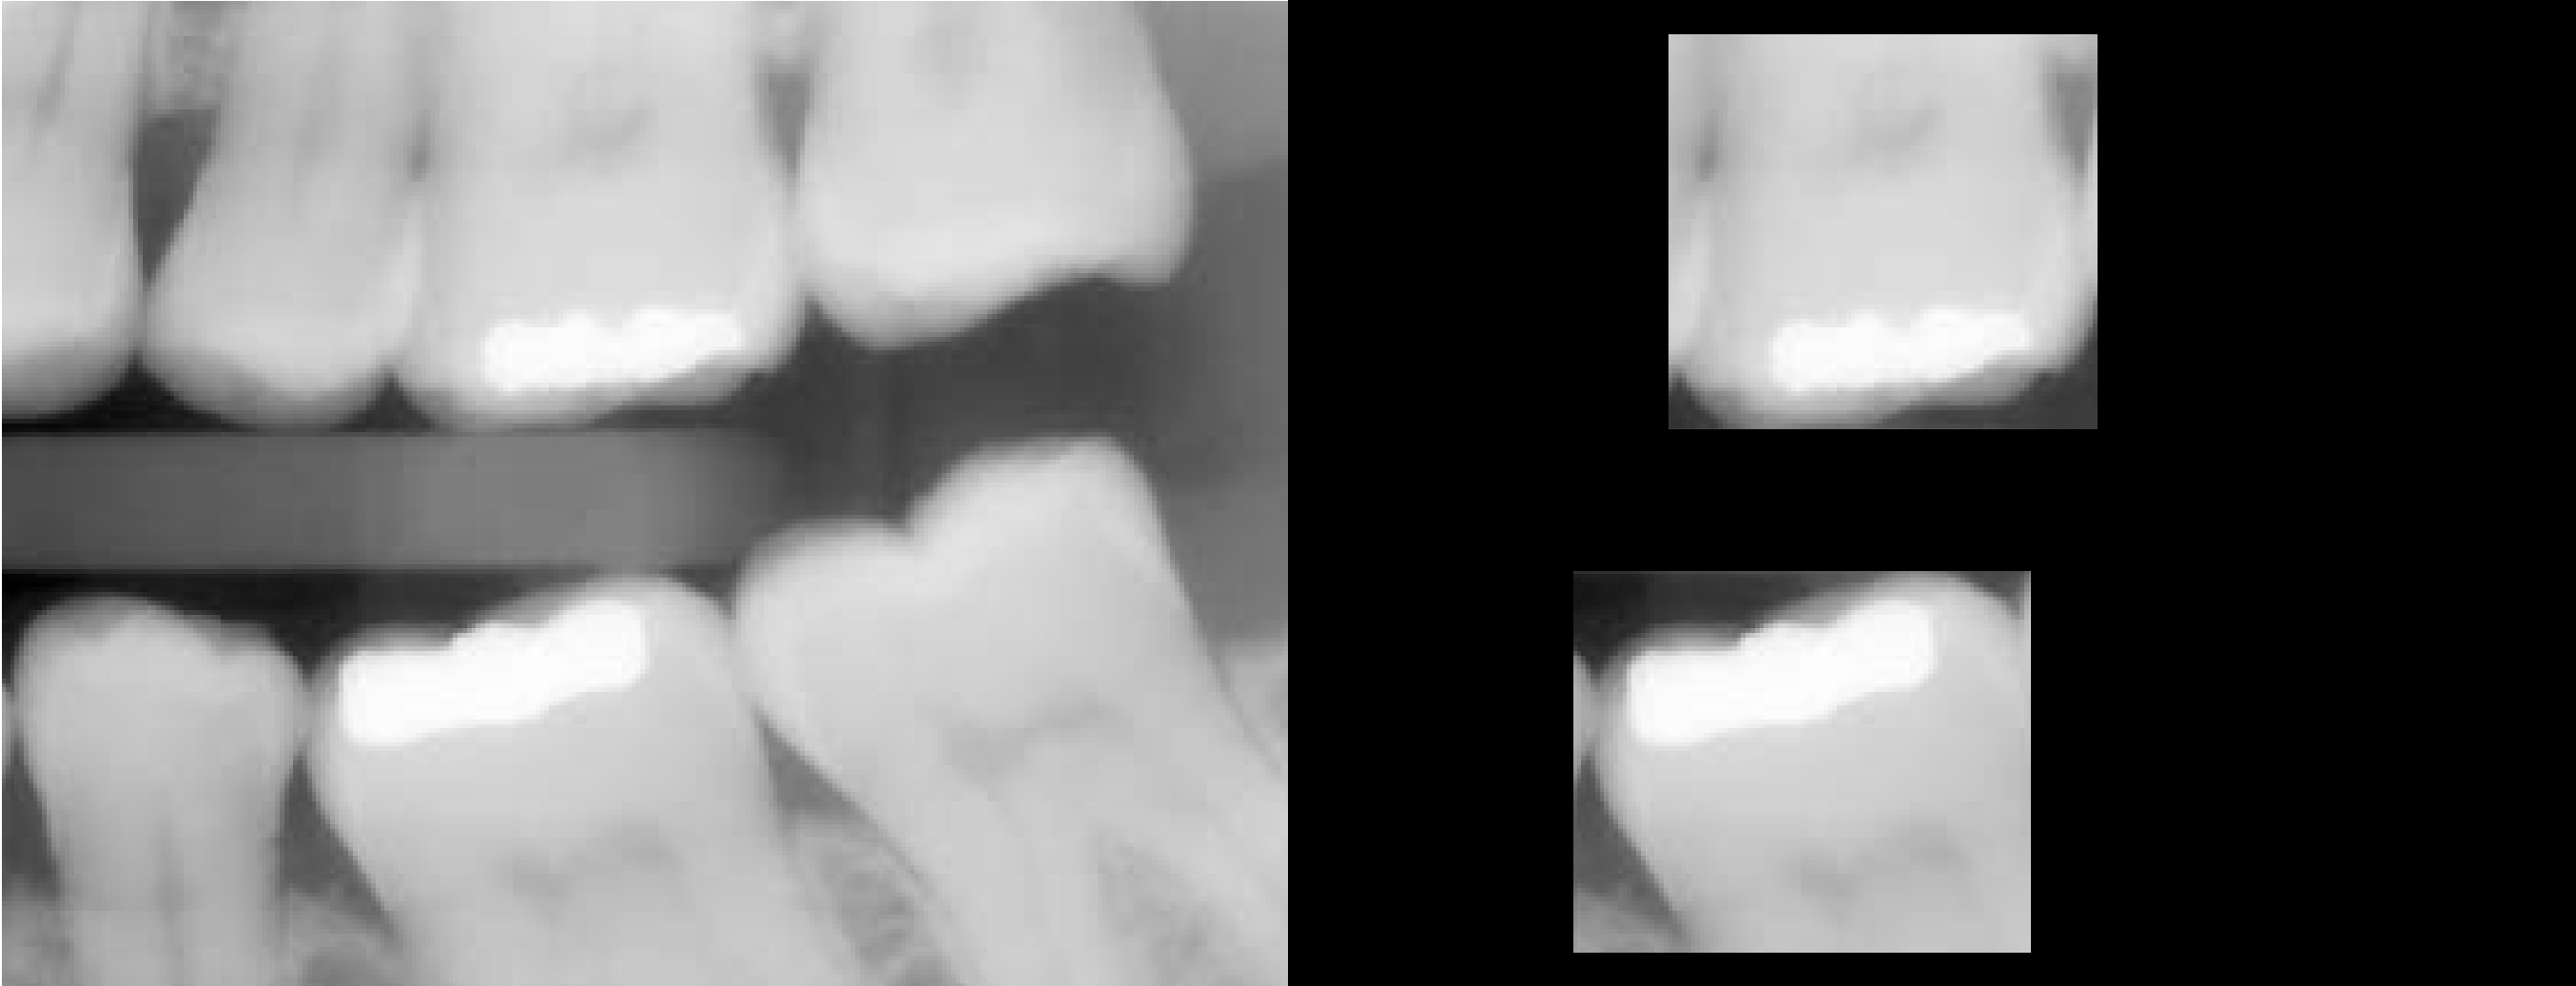

In [ ]:
# Tugas 4
# Image masking

print(' Image masking ')
print('----------------------------------------------')

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/teeth.jpg')
mask = np.zeros(original.shape, original.dtype)
# Membuat masking
mask = cv.rectangle(mask, (300, 1000), (780, 600), (255,255,255), -1)
mask = cv.rectangle(mask, (400, 450), (850, 36), (255,255,255), -1)
result = cv.bitwise_and(original, mask)

final_frame = cv.hconcat((original, result))
cv2_imshow(final_frame)

 Image masking menggunakan operator selain AND 
----------------------------------------------


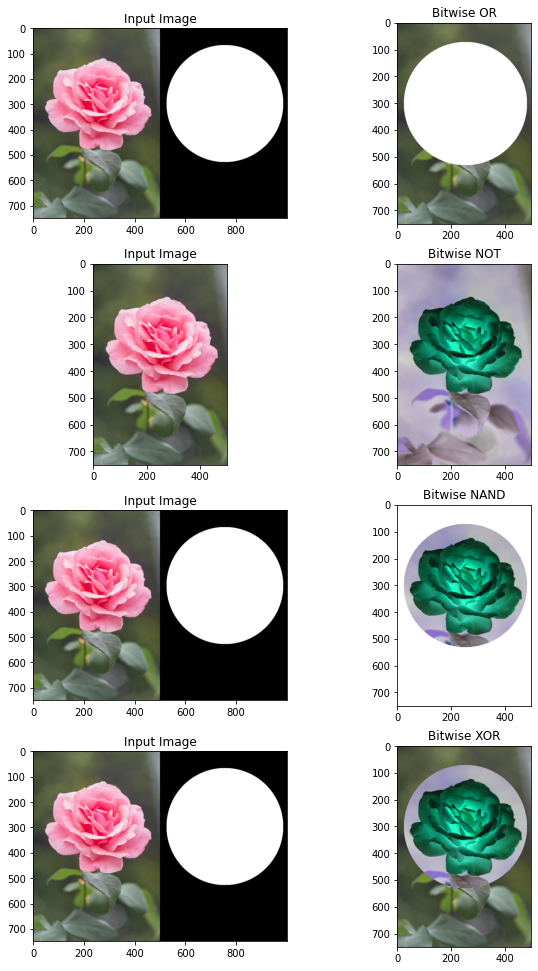

In [ ]:
# Tugas 5
# Image masking menggunakan operator lain

print(' Image masking menggunakan operator selain AND ')
print('----------------------------------------------')

# Membuat figure
fig = plt.figure(figsize=(10, 17))
title = ["Bitwise OR", "Bitwise NOT", "Bitwise NAND", "Bitwise XOR"]

# setting jumlah baris dan kolom
rows = 4
columns = 2

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/rose_pink.png')
original = cv.cvtColor(original, cv.COLOR_BGR2RGB)
a_image = np.zeros(original.shape, original.dtype)
b_image = np.zeros(original.shape, original.dtype)
c_image = np.zeros(original.shape, original.dtype)
d_image = np.zeros(original.shape, original.dtype)
arr_image = [a_image, b_image, c_image, d_image]

mask = np.zeros(original.shape, original.dtype)
mask = cv.circle(mask, (255, 300), 230, (255,255,255), -1)
input_image = cv.hconcat((original, mask))
# Pengolahan citra menggunakan operasi AND
and_image = cv.bitwise_and(original, mask)

for i in range(4):
  original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/rose_pink.png')
  original = cv.cvtColor(original, cv.COLOR_BGR2RGB)
  mask = np.zeros(original.shape, original.dtype)
  mask = cv.circle(mask, (255, 300), 230, (255,255,255), -1)
  if(i == 0):
    # Pengolahan citra menggunakan operasi OR
    arr_image[i] = cv.bitwise_or(original, mask)
  elif(i == 1):
    # Pengolahan citra menggunakan operasi NOT
    arr_image[i] = cv.bitwise_not(original)
  elif(i == 2):
    # Pengolahan citra menggunakan operasi NAND
    arr_image[i] = cv.bitwise_not(and_image)
  else:
    # Pengolahan citra menggunakan operasi XOR
    arr_image[i] = cv.bitwise_xor(original, mask)


index = 0
for i in range(8):
  fig.add_subplot(rows, columns, i+1)
  if(i%2 == 0):
    plt.title("Input Image")
    if(i == 2):
      plt.imshow(original)
    else:
      plt.imshow(input_image)
  else:
    plt.title(title[index])
    plt.imshow(arr_image[index])
    index += 1